# Analysis of Hate Crimes in the United States

## Introduction and Background

Hate crime statistics were downloaded from the Federal Bureau of Investigation (FBI) Crime Data Explorer (CDE). The data contain hate crimes reported between 1991 and 2020. All data are at the incident level. The FBI defines a hate crime as a crime that is "motivated in whole, or in part, by an offender’s bias against the victim’s perceived race, gender, gender identity, religion, disability, sexual orientation, or ethnicity."

## Executive Summary

The researchers (Sakshi and Abbie) determined 4 primary topics to explore for their analysis:
1. What have been the overall trends of hate crime frequency over the years? 
2. Do the number of hate crimes vary by region of the United States? 
3. How common are multiple offenses vs. single offenses and are they related to multiple vs. single bias?
4. What is the average number of victims for one hate crime? Is it common for a hate crime to involve multiple victims?

After analyzing these questions, the researchers determined that... 

It is not common for the FBI to categorize multiple offenses and/or multiple biases with a single hate crime. Rather, it is much more common for one hate crime to involve and single offense/single bias. If a hate crime *does* involve multiple, it is more common to have multiple offenses per hate crime, as opposed to multiple biases. It was also determined that there is a statistically significant relationship between offense (multiple vs. single) and bias (multiple vs. single). However, more tests would be needed to determine strength or association of this relationship. 

This analysis also determined that the average hate crime (as reported to the FBI) involves approximately 1 victim. After filtering the data for hate crimes involving multiple victims, the average was moved slightly higher to approximatley 3 victims. There were also extreme outliers of victim counts in the data set. It was concluded that the overwhelming majority of hate crimes involve fewer than 10 victims. Higher victim counts for one hate crime *do* occur, but they are definitely rare. Among hate crimes with multiple victims, about 0.12% of hate crimes involved more than 30 victims, 0.44% involved 11 to 29 victims, and 99.44% involved 2 to 10 victims. When looking at the entire data set, 89.29% (n=219,577) involved a single victim and 10.71% of hate crimes involved multiple victims (n=26,343). 

Please note, this analysis was exploratory and more research should be conducted to better understand any associations between variables. 

Please refer to code below to better understand the methods and details of the analysis

##  Methods

### Load all dependencies 

First the following modules were imported to conduct the analysis. The csv file was also downloaded.

In [2]:
# Import necessary modules
import pandas as pd
import numpy as np
import math
import statistics
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt


# Import csv file from FBI CDE website
fbi_crime = "hate_crime.csv"
hate_crime_df = pd.read_csv(fbi_crime, low_memory=False)

### Initial Exploration of Data

Next, the data were explored for very basic summary statistics in order to help guide our questions.

In [3]:
# View data frame to get basic idea of data
hate_crime_df.head()

# Look at number of rows (sampl size)
len(hate_crime_df.index)

219577

In [4]:
# Describe the numeric variables in the data set to obtain basic statistics
hate_crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219577 entries, 0 to 219576
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   INCIDENT_ID               219577 non-null  int64  
 1   DATA_YEAR                 219577 non-null  int64  
 2   ORI                       219577 non-null  object 
 3   PUB_AGENCY_NAME           219577 non-null  object 
 4   PUB_AGENCY_UNIT           6431 non-null    object 
 5   AGENCY_TYPE_NAME          219577 non-null  object 
 6   STATE_ABBR                219577 non-null  object 
 7   STATE_NAME                219577 non-null  object 
 8   DIVISION_NAME             219577 non-null  object 
 9   REGION_NAME               219577 non-null  object 
 10  POPULATION_GROUP_CODE     219577 non-null  object 
 11  POPULATION_GROUP_DESC     219577 non-null  object 
 12  INCIDENT_DATE             219577 non-null  object 
 13  ADULT_VICTIM_COUNT        51411 non-null   f

In [5]:
# Display all variable names
print(hate_crime_df.columns)

Index(['INCIDENT_ID', 'DATA_YEAR', 'ORI', 'PUB_AGENCY_NAME', 'PUB_AGENCY_UNIT',
       'AGENCY_TYPE_NAME', 'STATE_ABBR', 'STATE_NAME', 'DIVISION_NAME',
       'REGION_NAME', 'POPULATION_GROUP_CODE', 'POPULATION_GROUP_DESC',
       'INCIDENT_DATE', 'ADULT_VICTIM_COUNT', 'JUVENILE_VICTIM_COUNT',
       'TOTAL_OFFENDER_COUNT', 'ADULT_OFFENDER_COUNT',
       'JUVENILE_OFFENDER_COUNT', 'OFFENDER_RACE', 'OFFENDER_ETHNICITY',
       'VICTIM_COUNT', 'OFFENSE_NAME', 'TOTAL_INDIVIDUAL_VICTIMS',
       'LOCATION_NAME', 'BIAS_DESC', 'VICTIM_TYPES', 'MULTIPLE_OFFENSE',
       'MULTIPLE_BIAS'],
      dtype='object')


# Research Questions

After initial exploration of the data, four primary research questions were determined. The questions, along with their methods and results are outlined below.

### 1) What have been the overall trends of hate crime frequency over the years?
We explore here the total number of hate crime inident trend over past 30 years.
We then subet this data by decade and for the last 10 years(2011-2020) to dive deeper

#### Incidents per year for last 30 years

In [6]:
# Calculatinf the total number of incidents per year and sorting by year
hate_crime_df_by_year = hate_crime_df["DATA_YEAR"].value_counts().sort_index()

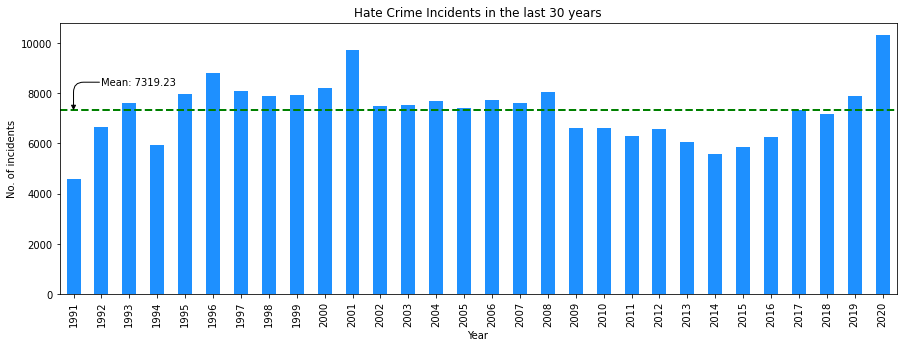

In [7]:
# Plotting the data of number of incidents per year
fig1, ax1 = plt.subplots()
fig1 = hate_crime_df_by_year.plot.bar(color='dodgerblue', figsize=(15,5))

ax1.set_xlabel("Year")
ax1.set_ylabel("No. of incidents")
ax1.set_title("Hate Crime Incidents in the last 30 years")

# Calculating the mean of the number of incidents over 30 years to display on the plot
ym = hate_crime_df_by_year.mean()
ax1.axhline(ym, color='green', linewidth=2, linestyle = '--')
ax1.annotate('Mean: {:0.2f}'.format(ym), xy=(0, ym), xytext=(1,ym+1000),arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0,
                            connectionstyle='angle,angleA=0,angleB=90,rad=10'))
# Save figure and then display
plt.show()

#### Observations:
    1. Mid 90s onwards we see an increase in hate crimes which peaked in the year 2001
    2. 2009 to 2014 there a dip in the hate crime incidents were seen, post which we see a steady rise in the cases
    3. 2020 recorded the hight number of hate crime cases across country crossing 10,000 cases a year
    4. On an average 7319 incidents of hate crime are recorded in the United States each year

##### We next see a cumulative incidents for past 3 decades to get a summary view of the above data

In [8]:
# Creating bins and label to add a coulmn for Decade 

decade_bins = [1990,2000,2010,2020]
decade_labels = ["2000","2010","2020"]
hate_crime_df["decade_ending"] = pd.cut(hate_crime_df["DATA_YEAR"],decade_bins,labels = decade_labels)
hate_crime_df.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS,decade_ending
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S,2000
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S,2000
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S,2000
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S,2000
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S,2000


In [9]:
hate_crime_df.groupby("decade_ending")[["INCIDENT_ID"]].count()

,INCIDENT_ID
decade_ending,
2000,73730
2010,76481
2020,69366


#### Observations:
    - Interesting to note that 2011-2020 decade has the lowest cumulative hate crime inicidents than the previous 2 decades
    - 2001-2010 recorded the most incidents 
    
    
#### Percent Distribution of incidents across bias categories
Next we explore the BIAS_DESC column of the dataset. 

"BIAS_DESC" column categorizes each incident with the offender's bias behind the crime. This dataset has 279 unique bias category. We try to find the top categories here.

In [10]:
print(hate_crime_df["BIAS_DESC"].nunique())

279


In [11]:
bias_count_data = hate_crime_df.groupby("BIAS_DESC")["INCIDENT_ID"].count()
bias_count_data_df = pd.DataFrame(bias_count_data)
bias_count_data_df = bias_count_data_df.sort_values("INCIDENT_ID",ascending=False)
bias_count_data_df["% Distribution"] = bias_count_data_df["INCIDENT_ID"]/bias_count_data_df["INCIDENT_ID"].sum() * 100
bias_count_data_df["% Distribution"] = bias_count_data_df["% Distribution"].map('{:,.2f}%'.format)
bias_count_data_df.head(15)

,INCIDENT_ID,% Distribution
BIAS_DESC,,
Anti-Black or African American,74762,34.05%
Anti-Jewish,28013,12.76%
Anti-White,25193,11.47%
Anti-Gay (Male),21854,9.95%
Anti-Hispanic or Latino,14030,6.39%
Anti-Other Race/Ethnicity/Ancestry,10772,4.91%
"Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",6707,3.05%
Anti-Asian,6424,2.93%
"Anti-Multiple Races, Group",5232,2.38%


#### Observations:
    - 34% cases of hate crime are Anti-African American followed by Anti-Jewish and Anti-White at 13% and 11% respectively.
    
#### Percent Distribution of incidents across offense type
Next we explore the OFFENSE_NAME column of the dataset. 

"OFFENSE_NAME" column list the offense type associated with each incident. This dataset has 353 unique offense type. We try to find the top categories here.

In [12]:
hate_crime_df["OFFENSE_NAME"].nunique()

353

In [13]:
offense_count_data = hate_crime_df.groupby("OFFENSE_NAME")["INCIDENT_ID"].count().sort_values(ascending=False)
offense_count_data_df = pd.DataFrame(offense_count_data)
offense_count_data_df["% Distribution"] = offense_count_data_df["INCIDENT_ID"]/offense_count_data_df["INCIDENT_ID"].sum() * 100
offense_count_data_df["% Distribution"] =offense_count_data_df["% Distribution"].map('{:,.2f}%'.format)
offense_count_data_df.head(5)

,INCIDENT_ID,% Distribution
OFFENSE_NAME,,
Destruction/Damage/Vandalism of Property,66774,30.41%
Intimidation,64093,29.19%
Simple Assault,41719,19.00%
Aggravated Assault,22927,10.44%
Robbery,3703,1.69%


### 2) Do the number of hate crimes vary by region of the United States?

We now subset the data to focus on 2011-2020 decade.
And see the data Region wise. 
(Note: Here we focus on four major regions of US : 'South', 'West', 'Northeast' & 'Midwest' . We removed the  'U.S. Territories','Other' as the data was negligible and removing it helps in better analysis)

##### Hate Crime Incident Count across major 4 regions in the US for the time period  2011-2020

In [34]:
# Cleaning Region_Name column to have only four major regions : Northeast, Midwest. South and West

hate_crime_df["REGION_NAME"] = hate_crime_df["REGION_NAME"].replace('U.S. Territories',np.nan)
hate_crime_df["REGION_NAME"] = hate_crime_df["REGION_NAME"].replace('Other', np.nan)

# Subsetting the data to include only 2011-2020 data and grouping by year and region to save as new dataframe
hate_crime_df_last_10yr_region = hate_crime_df[hate_crime_df["DATA_YEAR"]>=2009]
hate_crime_df_group_by_region_year = hate_crime_df_last_10yr_region.groupby(["DATA_YEAR","REGION_NAME"])
hate_crime_df_group_by_region_year_count = hate_crime_df_group_by_region_year["INCIDENT_ID"].count()

hate_crime_df_group_by_region_year_count.head()

DATA_YEAR  REGION_NAME
2009       Midwest        1407
           Northeast      1878
           South          1352
           West           1976
2010       Midwest        1299
Name: INCIDENT_ID, dtype: int64

In [35]:
# defining a list to specify color for each region
color_region = {'Midwest':'tab:cyan','Northeast':'tab:olive','South':'tab:purple','West':'tab:red'}

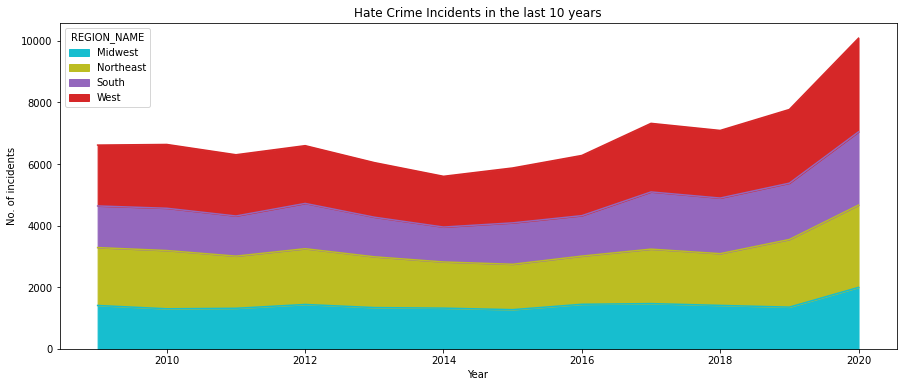

In [36]:
ax4 = hate_crime_df_group_by_region_year_count.unstack(fill_value=0).plot.area(figsize=(15,6),color=color_region)

ax4.set_xlabel("Year")
ax4.set_ylabel("No. of incidents")
ax4.set_title("Hate Crime Incidents in the last 10 years")

plt.show()

#### Observations:
    1. West followed by Northeast constitute the major share of the hate crime incidents in the last year.
    2. Increase in incidents in 2020 are seen across all regions

However this might not give us the correct picture as this does not take in account the poulation density in each region.

For this we will take census population for the last three decades region wise. Decadal data of incidents and population region wise is taken to calculate the crime rate per 100,000 people.



###### Decadal incident count 

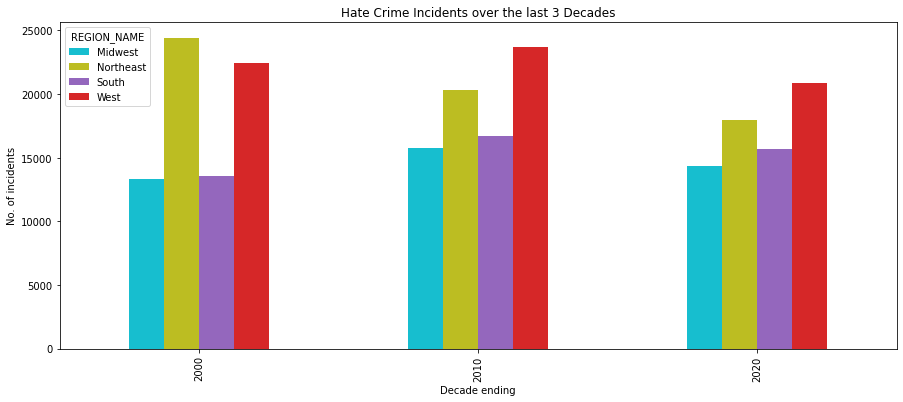

In [37]:
region_incident_df = hate_crime_df[["decade_ending","REGION_NAME"]].value_counts().sort_index()

ax4 = region_incident_df.unstack(fill_value=0).plot.bar(figsize=(15,6),color=color_region)

ax4.set_xlabel("Decade ending")
ax4.set_ylabel("No. of incidents")
ax4.set_title("Hate Crime Incidents over the last 3 Decades")

plt.show()

#### Observations:
    1. Northeast region had the highesht shares on incidents during 1991-2000.
    2. Following decades saw West region reporting the highest hate crime incidents.
    3. Midwest and South region had approximately equal incidens reported across 3 decades.

##### Importing census population data for better understanding of crime rate 

Source: https://www.census.gov/data/tables/time-series/dec/popchange-data-text.html

In [46]:
pop_census_df = pd.read_csv("Census-Population-by-Region.csv")
pop_census_df

,State or Region,2020,2010,2000,1990,1980,1970,1960,1950,1940,1930,1920
0,Northeast,"57,609,148","55,317,240","53,594,378","50,809,229","49,135,283","49,040,703","44,677,819","39,477,986","35,976,777","34,427,091","29,662,053"
1,Midwest,"68,985,454","66,927,001","64,392,776","59,668,632","58,865,670","56,571,663","51,619,139","44,460,762","40,143,332","38,594,100","34,019,792"
2,South,"126,266,107","114,555,744","100,236,820","85,445,930","75,372,362","62,795,367","54,973,113","47,197,088","41,665,901","37,857,633","33,125,803"
3,West,"78,588,572","71,945,553","63,197,932","52,786,082","43,172,490","34,804,193","28,053,104","20,189,962","14,379,119","12,323,836","9,213,920"


In [47]:
# Filtering down to last 3 decades of population data required for anlysis

pop_census_df = pop_census_df[["State or Region","2020","2010","2000"]]
pop_census_df = pop_census_df.set_index("State or Region")
pop_census_df

,2020,2010,2000
State or Region,,,
Northeast,"57,609,148","55,317,240","53,594,378"
Midwest,"68,985,454","66,927,001","64,392,776"
South,"126,266,107","114,555,744","100,236,820"
West,"78,588,572","71,945,553","63,197,932"


In [48]:
region_incident_df

Incident_Count  population
decade_ending REGION_NAME                            
2000          Midwest               13329    64392776
              Northeast             24414    53594378
              South                 13554   100236820
              West                  22433    63197932
2010          Midwest               15727    66927001
              Northeast             20350    55317240
              South                 16707   114555744
              West                  23693    71945553
2020          Midwest               14352    68985454
              Northeast             18000    57609148
              South                 15717   126266107
              West                  20870    78588572

In [49]:
# Renaming colums and setting up index for decdal region wise dataframe "region_incident_df" 
region_incident_df = region_incident_df.reset_index()
region_incident_df = region_incident_df.rename(columns = {0:"Incident_Count"})
region_incident_df = region_incident_df[["decade_ending", "REGION_NAME", "Incident_Count"]]
region_incident_df = region_incident_df.set_index(["decade_ending","REGION_NAME"])
region_incident_df

Incident_Count
decade_ending REGION_NAME                
2000          Midwest               13329
              Northeast             24414
              South                 13554
              West                  22433
2010          Midwest               15727
              Northeast             20350
              South                 16707
              West                  23693
2020          Midwest               14352
              Northeast             18000
              South                 15717
              West                  20870

In [50]:
# Populating a list with census population data and adding it as column to the region_incident_df datafrane
population_data = []
for index, row in region_incident_df.iterrows():
    population_data.append(pop_census_df[index[0]][index[1]])

region_incident_df["population"] = population_data
print(region_incident_df.info())
# The population column is of the object type and needs to be converted to int
region_incident_df["population"] = region_incident_df["population"].convert_dtypes()
region_incident_df["population"] = region_incident_df["population"].str.replace(',','')
region_incident_df["population"] = region_incident_df["population"].astype(int)
print(" ")
region_incident_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 12 entries, ('2000', 'Midwest') to ('2020', 'West')
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Incident_Count  12 non-null     int64 
 1   population      12 non-null     object
dtypes: int64(1), object(1)
memory usage: 677.0+ bytes
None
 
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 12 entries, ('2000', 'Midwest') to ('2020', 'West')
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Incident_Count  12 non-null     int64
 1   population      12 non-null     int32
dtypes: int32(1), int64(1)
memory usage: 629.0+ bytes


In [51]:
# Now we have the incident count and population data grouped by decade and region
region_incident_df

Incident_Count  population
decade_ending REGION_NAME                            
2000          Midwest               13329    64392776
              Northeast             24414    53594378
              South                 13554   100236820
              West                  22433    63197932
2010          Midwest               15727    66927001
              Northeast             20350    55317240
              South                 16707   114555744
              West                  23693    71945553
2020          Midwest               14352    68985454
              Northeast             18000    57609148
              South                 15717   126266107
              West                  20870    78588572

##### Calculating the crime rate per 100,000 people and plotting the data

In [52]:
# Crime rate per 100000 = incident count / population * 100000

region_incident_df["crime_rate"] = (region_incident_df["Incident_Count"]/region_incident_df["population"]) * 100000
region_incident_df

Incident_Count  population  crime_rate
decade_ending REGION_NAME                                        
2000          Midwest               13329    64392776   20.699527
              Northeast             24414    53594378   45.553285
              South                 13554   100236820   13.521977
              West                  22433    63197932   35.496415
2010          Midwest               15727    66927001   23.498737
              Northeast             20350    55317240   36.787808
              South                 16707   114555744   14.584166
              West                  23693    71945553   32.931848
2020          Midwest               14352    68985454   20.804386
              Northeast             18000    57609148   31.245038
              South                 15717   126266107   12.447521
              West                  20870    78588572   26.556024

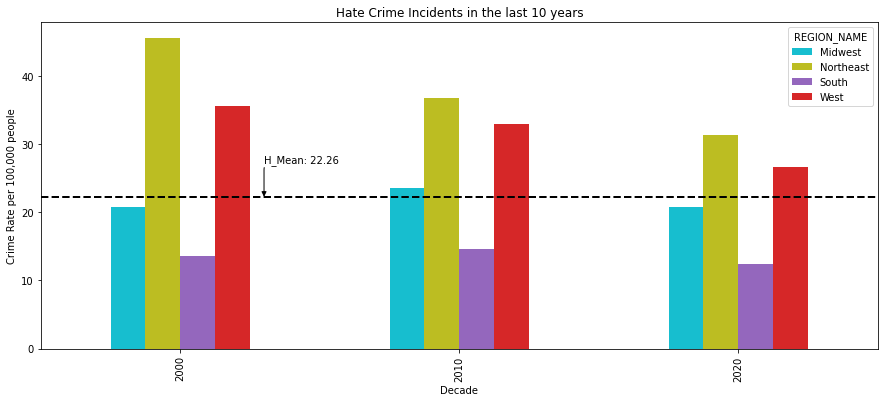

In [32]:
# Plotting for decadal crime rate data

ax5 = region_incident_df["crime_rate"].unstack(fill_value=0).plot.bar(figsize=(15,6),color=color_region)

ax5.set_xlabel("Decade")
ax5.set_ylabel("Crime Rate per 100,000 people")
ax5.set_title("Hate Crime Incidents in the last 10 years")

ym = stats.hmean(region_incident_df["crime_rate"])
ax5.axhline(ym, color='black', linewidth=2, linestyle = '--')
ax5.annotate('H_Mean: {:0.2f}'.format(ym), xy=(0.3, ym), xytext=(0.3,ym+5),arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0,
                            connectionstyle='angle,angleA=0,angleB=90,rad=10'))

plt.show()

#### Observations:
    1. With crime rate we can deduce that that hate crime incidents per 100,000 people are higher in Northeast region followed by West regon
    2. As observed before the with incident counts, crime rate too across regions has decreased in last 3 decades
    3. On an average across all four region 22 incidents of hate crime are reported for every 100,000 people.

In [53]:
# Reset hate_crime_df for further analysis
hate_crime_df = pd.read_csv(fbi_crime, low_memory=False)

### 3) How common are multiple offenses/biases vs. single offenses/biases? Are they related to each other?

An 'offense' is a crime committed by a person. One person can commit either one offense (single offense) or multiple offenses. 
A 'bias' in this data set is a prejudice and/or hateful reason for committing the crime that is based around the victim's perceived or real identity (i.e. bias against a gender, race, religion, etc.). An offender can have one bias (single bias) that motivates a hate crime or several (multiple bias). 

To determine whether single offenses/biases were more common than multiple offenses/biases, the hate crime data frame was grouped by 'multiple offense' and then later grouped by 'multiple bias.' Counts for both groups were obtained to view the differing frequencies.

**Offense**

In [ ]:
# Group by 'multiple offense' to see if multiple or single offenses are more common
# Count by incident_id to obtain total values
offense_type = hate_crime_df.groupby('MULTIPLE_OFFENSE')['INCIDENT_ID'].count()
offense_type

**Bias**

In [ ]:
# Group by 'multiple bias' to see if multiple or single biases are more common
# Count by incident_id to obtain total values
bias_type = hate_crime_df.groupby('MULTIPLE_BIAS')['INCIDENT_ID'].count()
bias_type

**Offense and Bias**

Next, both groups were placed in a data frame in order to summarize by their proportions (rather than counts only).

In [ ]:
# Create a data frame that displays the counts of multiple offense vs. single offense, as well as the counts for multiple
  # bias vs. single bias. Also include the proportions for both, so that it is easier to interpret. 

# Create data frame
offense_bias = pd.DataFrame({'Offense':offense_type,
                            'Proportion_Offense':offense_type/sum(offense_type), #calculate proportion 
                             'Bias':bias_type,
                             'Proportion_Bias':bias_type/sum(bias_type) #calculate proportion
                            })
offense_bias

The data clearly show that a single offense/bias is much more common than multiple offenses/biases. Specifically, about 4.43% of hate crimes in our data set involved multiple offenses, vs. 95.57% involving a single offense. 

This difference was even more pronounced when looking at bias. Less than 1% (0.46%) of hate crimes in our data set involved multiple biases vs. 99.44% of hate crimes involved a single bias.

**Visualizing these proportions**

To truly see the wide range between multiple offenses/biases vs. single offenses/biases, the data were ploted through a bar chart.

We can clearly see that hate crimes involving a single offense/bias are much more common than hate crimes involving multiple offenses/biases.

In [ ]:
# Create a bar plot to visually display the proportions
fig = offense_bias[['Proportion_Offense', 'Proportion_Bias']].plot(kind='bar', 
                                       xlabel='',
                                       ylabel='Proportion')
plt.xticks(rotation=0)
plt.title('A single offense/bias is much more common than multiple', fontsize=14, fontweight='bold')
plt.legend(loc='upper left', fancybox=True, framealpha=1, borderpad=1)
fig.set_xticklabels(['Multiple','Single'])
fig.legend(labels=['Offense','Bias'])

# Save figure and then display
plt.savefig('OffenseBiasBar.png', format='png', dpi=150, bbox_inches='tight')
plt.show()

**Multiple Offenses/Biases only**

The visual above is meant to provide an overall picture of the data (how much more common single offenses/biases are than multiple).

An additional chart was created to "zoom in" to the multiple offenses/biases group. This allows us to better visualize the differences between multiple offenses and multiple biases.

In [ ]:
# First, we slice the data frame to only include the first row, which represents multiple biases/offenses.
M_only = pd.DataFrame(offense_bias.loc[['M']])
M_only # display the data

The chart below better displays that having multiple offenses for one hate crime is more common than having multiple biases in one hate crime. Because the proportions for the 'multiple' group were so small, a separate visual for this group was necessary.

In [ ]:
# Create a bar plot to visually display the proportions
fig = M_only[['Proportion_Offense', 'Proportion_Bias']].plot(kind='bar', 
                                       xlabel='Multiple',
                                       ylabel='Proportion')
plt.xticks(rotation=45)
plt.title('Multiple offenses are more common than multiple biases', fontsize=14, fontweight='bold')
plt.legend(loc='upper right', fancybox=True, framealpha=1, borderpad=1)
fig.legend(labels=['Offense','Bias'])
fig.set_xticks([])

# Save figure and then display
plt.savefig('multbar.png', format='png', dpi=150, bbox_inches='tight')
plt.show()

**Next, we determine whether biases and offenses are related to each other?**

Because the "offense" and "bias" variables are both categorical and dichotomous (M vs. S), we can run a Chi-square analysis to see whether the two variables are related or not.

The null hypothesis is that offense number and bias number are independent of each other. The alternative hypothesis (what we are testing for) is that offense number is *dependent* upon bias number.

To do this, we have to gather the "observed" numbers in our data set: (multiple offense with multiple bias; multiple offense with single bias; single offense with multiple bias; single offense with single bias). We have to compare the observed values to what we would "expect" to see in our population. We compare the observed and the expected to determine whether the difference between observed and expected happened just by chance (not significant), OR whether the difference is unlikely to happen just by chance (significant). If the test is significant, there is likely some sort of relationship between offense number and bias number. 

**Determine how many incidents involved multiple bias AND multiple offense**

Answer: 235 incidents

In [ ]:
# Check to see when there was a multiple offense with a multiple bias
hate_crime_df.loc[(hate_crime_df['MULTIPLE_BIAS']=='M') & (hate_crime_df['MULTIPLE_OFFENSE']=='M')]

# This indicates 235 occurences involved multiple bias with multiple offense

# Get length of the index of the slice to count how many
len(hate_crime_df.loc[(hate_crime_df['MULTIPLE_BIAS']=='M') & (hate_crime_df['MULTIPLE_OFFENSE']=='M')].index)

**Determine how many incidents involved single bias AND single offense**

Answer: 209,073 incidents

In [ ]:
# Check to see when there was a single offense with a single bias
hate_crime_df.loc[(hate_crime_df['MULTIPLE_BIAS']=='S') & (hate_crime_df['MULTIPLE_OFFENSE']=='S')]

# This indicates 209,073 occurences involved a single bias with a single offense

# Get length of the index of the slice to count how many
len(hate_crime_df.loc[(hate_crime_df['MULTIPLE_BIAS']=='S') & (hate_crime_df['MULTIPLE_OFFENSE']=='S')].index)

**Determine how many incidents involved multiple bias AND single offense**

Answer: 784 incidents

In [ ]:
# Check to see when there was a single offense with multiple bias
hate_crime_df.loc[(hate_crime_df['MULTIPLE_BIAS']=='M') & (hate_crime_df['MULTIPLE_OFFENSE']=='S')]

# This indicates that 784 occurences involved multiple bias with a single offense

# Get length of the index of the slice to count how many
len(hate_crime_df.loc[(hate_crime_df['MULTIPLE_BIAS']=='M') & (hate_crime_df['MULTIPLE_OFFENSE']=='S')].index)

**Determine how many incidents involved single bias AND multiple offense**

Answer: 9485 incidents

In [ ]:
# Check to see when there was multiple offenses with a single bias
hate_crime_df.loc[(hate_crime_df['MULTIPLE_BIAS']=='S') & (hate_crime_df['MULTIPLE_OFFENSE']=='M')]

# This indicates that 9485 occurences involved multiple bias with a single offense

# Get length of the index of the slice to count how many
len(hate_crime_df.loc[(hate_crime_df['MULTIPLE_BIAS']=='S') & (hate_crime_df['MULTIPLE_OFFENSE']=='M')].index)

Now that we know the observed values in our data frame for all of the combinations, we can add them into an array of observed values. We will call the array "observed." 

In [ ]:
# Create an array with the observed values. We will need this to run the Chi-square.
observed = np.array([[235, 9485], [784, 209073]])
observed

In [ ]:
# Calculated the statistic by hand first to compare to function from scipy.stats
## Without Yates correction value is 840.26 (Yates correction makes the value for conservative)

(((235-45.11)**2)/45.11 + ((9485-9674.89)**2)/9674.89 + ((784-973.89)**2)/973.89 + ((209073-208883.11)**2)/208883.11)

In [ ]:
# Import the chi2_contingency function to use for our test
from scipy.stats import chi2_contingency 

We run the Chi-square test of independence to see if there is a statistically significant relationship between offense and bias.

In [ ]:
# Run a Chi-square test of independence 

# Obtain the value of the Chi statistic (chi_val)
# Obtain p-value (p_val); check that value is less than 0.05 for significance 
# Obtain degrees of freedom (dof); should be 1, since we are using 2X2 values in our "observed" array
# Obtain 'expected', which are the values we would expected to see; these are the values we are comparing to.

# Here is the actual test (arguments are explained above)
chi_val, p_val, dof, expected =  chi2_contingency(observed, correction=True) 
            # "observed" means we are testing the data in the array called 'observed'
            # Correction = True, to use the Yates correction. 

# Keeping correction for Yates' continuity so that estimates are more conservative
chi_val, p_val, dof, expected

**Chi Square Test Results and Interpretation**

The test above shows a Chi-square statistic of approximately 835.90, with 1 degree of freedom, and a p-value much less than 0.05. This suggests that there *is* a statistically significant relationship between offense number and bias number. We fail to reject the null hypothesis that offense number and bias number are independent of each other.

Please note, this test does not tell us anything about the specific nature of the relationship - only that one exists. To analyze the actual relationship, we would need to run further tests to determine strength and/or association of the relationship between offenses and biases. These additional tests are outside the scope of this exploratory analysis, but should be considered for future research.

### 4) What is the average number of victims for one hate crime? Is it common for a hate crime to involve multiple victims?

**Basic Summary Statistics**

First, we describe the 'total_individual_victims' column in our data set to get basic summary statistics. 

From this, we determine that the average number of victims for one hate crime is 1 victim (**mean=0.98**) with a standard deviation of 1.17. There is a maximum count of 147, indicating that some of the hate crimes definitely involve multiple victims.

In [ ]:
# Describe the total individual victims variable in the full data set
hate_crime_df['TOTAL_INDIVIDUAL_VICTIMS'].describe()

# The average total victims for hate crimes is 0.99 with a standard deviation of 1.17.
# The max number of victims is 147. This prompts a follow-up question of 'how many incidents involve more than 1 victim'?

**Box Plot of Total Number of Victims**

To better visualize the distribution and spread of the data, a box plot was constructed. 

This box plot is overwhelmed by outliers in our data. This visual suggests that the number of victims in our sample is a very wide range, yet the vast majority of incidents do not involve many victims. As indicated by this plot, the median, 25th, and 75th percentile are all 1.

In [ ]:
# Look at distribution with box plot
g = sns.boxplot(x=hate_crime_df['TOTAL_INDIVIDUAL_VICTIMS'])
g.set_title('Distribution of Total Number of Victims per Hate Crime in the U.S.', size=12, weight='bold')
g.set_xlabel('Total Individual Victims')

# Save figure and then display
plt.savefig('fullboxplot.png', format='png', dpi=150, bbox_inches='tight')
plt.show()

**Box Plots of Total Victims by Region**

We can also view the box plots by region to see if these outliers exist in every region of the U.S., or if they are concentrated in one or two regions.

In [ ]:
# See if the distribution changes at all when looking by region
g2 = sns.boxplot(y=hate_crime_df["REGION_NAME"], 
            x=hate_crime_df["TOTAL_INDIVIDUAL_VICTIMS"],
           palette="Blues")

g2.set_title('Distribution of Total Number of Victims per Hate Crime, by Region in the U.S.', size=12, weight='bold')
g2.set_xlabel('Total Individual Victims')
g2.set_ylabel('')

# Save figure and then display
plt.savefig('Regionboxplot.png', format='png', dpi=150, bbox_inches='tight')
plt.show()

The box plot above displays that the extreme outliers are observed in every region in our sample. We can slice the data to be victim counts of less than 20 to have a better visualize the box plots.


The filtered box plots below suggest that the Northeast (on average) has fewer total victims per hate crime, when compared to other regions. The U.S territories appear to have the most total victims per hate crime (on average). However, the U.S. territories do not contain any of the outliers. The regions "other" and "west" had a hate crime with the highest total number of victims

In [ ]:
# See if the distribution changes at all when looking by region
fig, ax = plt.subplots()

sns.boxplot(y=victim20["REGION_NAME"], 
            x=victim20["TOTAL_INDIVIDUAL_VICTIMS"],
           palette="Blues")

ax.set_title('Distribution of Total Number of Hate Crime Victims by Region in the U.S.', size=12, weight='bold')
ax.set_xlabel('Total Individual Victims')
ax.set_ylabel('')

# Save figure and then display
plt.savefig('Regionboxplot20.png', format='png', dpi=150, bbox_inches='tight')
plt.show()

We know from these box plots that there are definite outliers in our sample. But how many? Lets sort our data frame by the total individual victims per hate crime to get an overall sense of incidents that involve mutliple victims. 

In [ ]:
# Sort by hate crime ascending to see higher victim counts
hate_crime_df.sort_values('TOTAL_INDIVIDUAL_VICTIMS', ascending=False).head()

# This initial scan displays that some hate crimes involve hundreds of victims. But how common is that?

**Exploring where total individual victims is greater than 1**

To explore this even further, the data were filtered by victim counts above 1. How does this change our distribution, if at all?

In [ ]:
# Check to see when a victim count is great than 1
victim_count =  hate_crime_df['TOTAL_INDIVIDUAL_VICTIMS']>1
victim_count.head()

In [ ]:
victim_count1 =  hate_crime_df['TOTAL_INDIVIDUAL_VICTIMS']==1
multiple_victim1 = hate_crime_df[victim_count1]
len(multiple_victim1.index)

In [ ]:
# Look at the data frame slice from above for victim counts greater than 1.
multiple_victim = hate_crime_df[victim_count]
multiple_victim.head()

After filtering the data for more than one victim, we now have a mean of 2.6 and a standard deviation of 2.65. This means the filtered data set actually has more spread than the original data set. Because the mean is larger than the median of 2, we also know what our distribution is slightly positively skewed. Because the 75% percentile is 3, we know that the higher victim counts are outliers. 

In [ ]:
# Describe the TOTAL_INDIVIDUAL_VICTIMS variable when greater than 1
multiple_victim['TOTAL_INDIVIDUAL_VICTIMS'].describe() # Now we have a mean of 2.60 and standard deviation of 2.65. 
# The spread around the mean is slightly higher when filtering for victim counts above 1.

The extreme outliers make this visual difficult to interpret, but one can still see the right, positive skew in our sample distribution of multiple victims. This indicates that the vast majority of hate crimes involve 2-3 victims, but some incidents involve hundreds of victims.

In [ ]:
# quick initial scan of the new distribution 
multiple_victim['TOTAL_INDIVIDUAL_VICTIMS'].hist(bins=200)

If we categorize and group the data into 'bins' of victim counts, we might better be able to understand how common these 'extreme' cases are, where hundreds of victims are involved.

In [ ]:
# Turn the slice of data into an actual data frame to work with
multiple_victim_df = pd.DataFrame(multiple_victim)
multiple_victim_df.head()

In [ ]:
# Check to see how common other victim counts are
# Group by TOTAL_INDIVIDUAL_VICTIMS to see
grouped_victim_df = multiple_victim_df.groupby('TOTAL_INDIVIDUAL_VICTIMS').count() 
grouped_victim_df

In [ ]:
# Establish bins and bin labels for victim counts
victim_bins = [1, 10, 29, 147]
victim_labels = ['2-10', '11-29', '30+']

# Create a new variable in the 'multiple_victim' data frame that categorizes the victim counts
multiple_victim_df['Number_of_Victims'] = pd.cut(multiple_victim_df["TOTAL_INDIVIDUAL_VICTIMS"], 
                                                    victim_bins, labels=victim_labels)

# Check that data frame has new column
multiple_victim_df

In [ ]:
# Group by the new 'Number_of_Victims' variable that we just created
victim_group = multiple_victim_df.groupby('Number_of_Victims')

# Get the total incidents per bin in order to compare
victim_counts = victim_group.agg({"Number_of_Victims": 'count'})
victim_counts

The table above displays that the vast majority of hate crimes involving multiple victims involve 2-10 victims. Hate crimes involving 11-29 victims are rare, but are slightly more common than hate crimes involving 30 or more victims. 

**Compare how common it is for a hate crime to involve single victims, as opposed to multiple** 

In [ ]:
# Finally, compare single victims to multiple
    # 219577 = total number of hate crimtes with only one victim
    # 26343 = total number of hate crimes with 2+ victims
    # 245920 = total number of individual hate crimes in data set
prop1 = 219577/245920
prop2 = 26343/245920
victim_compare = np.array([prop1,prop2])

In [ ]:
# Compare using a treemap
labels=['One Victim (89%)','Multiple Victims (11%)']

# Import squarify for tree map
import squarify

The tree map below better visualized how much more common it is for a hate crime to involve only one victim, as opposed to multiple.

In [ ]:
# Set up tree map; use array we created above for the data
fig, ax = plt.subplots(1, figsize = (6,6))
squarify.plot(sizes=victim_compare, 
              label=labels, 
              alpha=.5 )
plt.axis('off') # remove axis

# Add title
ax.set_title('Most Reported Hate Crimes Involve One Victim', size=12, weight='bold')
plt.show()

# Save plot
fig.savefig('treemap.png', dpi=150, bbox_inches="tight")